<a href="https://colab.research.google.com/github/sidkatiyar09/Udemy_python_data_Science_1/blob/main/Marketing%20analysis%20DAB303_0826422_Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install -U scikit-learn
!pip install category_encoders
!pip install matplotlib seaborn
!pip install pandas
!pip install numpy


In [37]:
!pip install skimpy

In [38]:
# import the libraries
import pandas as pd
import numpy as np

# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
data=pd.read_csv(r"/content/drive/MyDrive/PYTHON-DEMO/DAB303 Marketing analysis project 1/E-Commerce Churn Data.csv")


In [40]:
# Get the dimension of the data
print(data.shape)

(5630, 20)


In [41]:
# Get the information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [42]:
# Print the first 5 records of the dataset
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,130


# Skim() a better alternative to describe()

In [43]:
# skim()
import skimpy
skimpy.skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 5630   │ │ int64       │ 8     │                                                          │
│ │ Number of columns │ 20     │ │ float64     │ 7     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 5     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column          ┃ NA  ┃ NA %            ┃ mean   ┃ sd     ┃ p0    ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID      │   0 │               0 │  52820 │   1625 │ 50000 │ 51410 │ 52820 │ 54220 │ 55630 │ ██████ │  │
│ │ Churn           │   0 │               0 │ 0.1684 │ 0.3742 │     0 │     0 │     0 │     0 │     1 │ █    ▂ │  │
│ │ Tenure          │ 264 │ 4.6891651865008 │  10.19 │  8.557 │     0 │     2 │     9 │    16 │    61 │  █▄▂   │  │
│ │                 │     │             885 │        │        │       │       │       │       │       │        │  │
│ │ CityTier        │   0 │               0 │  1.655 │ 0.9154 │     1 │     1 │     1 │     3 │     3 │ █  ▁ ▄ │  │
│ │ WarehouseToHome │ 251 │ 4.4582593250444 │  15.64 │  8.531 │     5 │     9 │    14 │    20 │   127 │   █▂   │  │
│ │                 │     │              05 │        │        │       │       │       │       │       │        │  │
│ │ HourSpendOnApp  │ 255 │ 4.5293072824156 │  2.932 │ 0.7219 │     0 │     2 │     3 │     3 │     5 │   ▄█▄  │  │
│ │                 │     │              31 │        │        │       │       │       │       │       │        │  │
│ │ NumberOfDeviceR │   0 │               0 │  3.689 │  1.024 │     1 │     3 │     4 │     4 │     6 │ ▁▁▆█▃▁ │  │
│ │ egistered       │     │                 │        │        │       │       │       │       │       │        │  │
│ │ SatisfactionSco │   0 │               0 │  3.067 │   1.38 │     1 │     2 │     3 │     4 │     5 │ ▅▃ █▅▅ │  │
│ │ re              │     │                 │        │        │       │       │       │       │       │        │  │
│ │ NumberOfAddress │   0 │               0 │  4.214 │  2.584 │     1 │     2 │     3 │     6 │    22 │  █▃▂   │  │
│ │ Complain        │   0 │               0 │ 0.2849 │ 0.4514 │     0 │     0 │     0 │     1 │     1 │ █    ▃ │  │
│ │ OrderAmountHike │ 265 │ 4.7069271758436 │  15.71 │  3.675 │    11 │    13 │    15 │    18 │    26 │ █▆▄▂▂▁ │  │
│ │ FromlastYear    │     │              95 │        │        │       │       │       │       │       │        │  │
│ │ CouponUsed      │ 256 │ 4.5470692717584 │  1.751 │  1.895 │     0 │     1 │     1 │     2 │    16 │   █▁   │  │
│ │                 │     │              37 │        │        │       │       │       │       │       │        │  │
│ │ OrderCount      │ 258 │ 4.5825932504440 │  3.008 │   2.94 │     1 │     1 │     2 │     3 │    16 │  █▁▁   │  │
│ │                 │     │               5 │        │        │       │       │       │       │       │        │  │
│ │ DaySinceLastOrd │ 307 │ 5.4529307282415 │  4.543 │  

In [44]:
# Data description
print(data.describe(include='all'))

          CustomerID        Churn       Tenure PreferredLoginDevice  \
count    5630.000000  5630.000000  5366.000000                 5630   
unique           NaN          NaN          NaN                    3   
top              NaN          NaN          NaN         Mobile Phone   
freq             NaN          NaN          NaN                 2765   
mean    52815.500000     0.168384    10.189899                  NaN   
std      1625.385339     0.374240     8.557241                  NaN   
min     50001.000000     0.000000     0.000000                  NaN   
25%     51408.250000     0.000000     2.000000                  NaN   
50%     52815.500000     0.000000     9.000000                  NaN   
75%     54222.750000     0.000000    16.000000                  NaN   
max     55630.000000     1.000000    61.000000                  NaN   

           CityTier  WarehouseToHome PreferredPaymentMode Gender  \
count   5630.000000      5379.000000                 5630   5630   
unique     

In [45]:
# Print count of NA value in columns.
null_counts = data.isnull().sum()
print(null_counts)

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [46]:
# Replace "Mobile Phone" with "Phone" in the 'PreferredLoginDevice' column
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace('Phone','Mobile Phone')

# Replace "Cash on Delivery" with "COD" in the 'PreferredPaymentMode' column
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace( 'COD','Cash on Delivery')
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace( 'CC','Credit Card')

# Replace "Mobile Phone" with "Phone" in the 'PreferedOrderCat' column
data['PreferedOrderCat'] = data['PreferedOrderCat'].replace('Phone','Mobile Phone')

In [47]:
# Categorical to numerica conversion
import category_encoders as ce

encoder = ce.OrdinalEncoder(cols=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'])

# Fit and transform the encoder on the DataFrame
data_encoded = encoder.fit_transform(data)
data_encoded.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,1,3,6.0,1,1,3.0,3,1,2,1,9,1,11.0,1.0,1.0,5.0,160
1,50002,1,NaN,1,1,8.0,2,2,3.0,4,2,3,1,7,1,15.0,0.0,1.0,0.0,121
2,50003,1,NaN,1,1,30.0,1,2,2.0,4,2,3,1,6,1,14.0,0.0,1.0,3.0,120
3,50004,1,0.0,1,3,15.0,1,2,2.0,4,1,5,1,8,0,23.0,0.0,1.0,3.0,134
4,50005,1,0.0,1,1,12.0,3,2,NaN,3,2,5,1,3,0,11.0,1.0,1.0,3.0,130


## removing rows having na and storing missing data aas a backup
we are checking any na's in any of the follwoing columns
a columns may or may not have a aby na's
these columns might have missing values
columns_to_check = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

missing_data_encoded contains only the rows that initially had missing value /na'ss

missing_data_encoded = rows with na only

and these are later transformed in next step of imputation



data_encoded.dropna(subset=columns_to_check, inplace=True)** The reason why we used dropna() just before imputation when imputation itself can handle missing values.

allows imputation strategy like mean etc only on valid values not on NA's/anymissing value (the nas and missing values can lead to error in imputation)

we can skip this dropna for small codes but its a good practice to use dropna() before imputing data.

Dropping missing data first gives us a clean dataset to train our imputation models (only if we' using more advanced methods like machine learning models for imputation).
This means the imputation is based on a "complete" dataset, where the relationships between features and targets can be learned properly.

In [48]:
# Create an empty DataFrame to store missing values and corresponding rows
missing_data_encoded = pd.DataFrame(columns=data_encoded.columns)

# Specify the columns you want to check for missing values
columns_to_check = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']

# Find rows with missing values in the specified columns
missing_rows = data_encoded[data_encoded[columns_to_check].isna().any(axis=1)]

# Append the missing rows to the missing_data_encoded DataFrame
#  initially missing_data_encoded = empty !!!
missing_data_encoded = pd.concat([missing_data_encoded, missing_rows], ignore_index=True)

# Remove rows with missing values in the specified columns from data_encoded
# subset = columns_to_check

# tells dropna() to perform the removal on 'na' values on the specified columns only
data_encoded.dropna(subset=columns_to_check, inplace=True)

# Reset the index for both dataframes
data_encoded.reset_index(drop=True, inplace=True)
missing_data_encoded.reset_index(drop=True, inplace=True)

# Make the data types of missing_data_encoded match data_encoded
# making datatypes of both dataset same i.e they both should have same datatypes
missing_data_encoded = missing_data_encoded.astype(data_encoded.dtypes)

<ipython-input-48-edf201b56485>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  missing_data_encoded = pd.concat([missing_data_encoded, missing_rows], ignore_index=True)


## Transform the missing target values to something meaningful
Imputation
( use mean or mode to replace any na in target variable) the missing data na in target emputation
We have used the loop because since we have multiple  columns with missing values that you want to impute. Instead of writing the same imputation code for each column separately, the loop is more efficient.

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Loop through each target variable
target_variables = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
for target_variable in target_variables:
    # Step 1: Split data_encoded into features and target
    X = data_encoded.drop(columns=[target_variable])  # Features
    y = data_encoded[target_variable]  # Target variable

    # Step 2: Create an imputer to handle missing values for both features and target
    feature_imputer = SimpleImputer(strategy='mean')
    target_imputer = SimpleImputer(strategy='mean')

    # Fit the imputers on your feature matrix X and target variable y
    feature_imputer.fit(X)
    target_imputer.fit(y.values.reshape(-1, 1))  # Reshape y to be a 2D array
                                                #  Reshape is necessary because the SimpleImputer expects a 2D array-like object as input,
                                                #  even if we're imputing only one column.

    # Transform X to replace missing values with the mean
    X_imputed = feature_imputer.transform(X)

    # Transform y to replace missing values with the mean
    #  Reshape is necessary because the SimpleImputer expects a 2D array-like object as input,
    #  even if we're imputing only one column.

    # -1: This is a special value in reshape() that means "calculate the appropriate number of rows to fit the data, given the number of columns I've specified."
    # 1: This specifies that the reshaped array should have 1 column.
    y_imputed = target_imputer.transform(y.values.reshape(-1, 1))

    # Flatten y_imputed back to a 1D array
    # flatten() converts an array and "flattens" it into a 1D array
    # Since have a 2D array like [,], flatten() will convert it to 1-D
    # After the SimpleImputer transforms the target variable y, it returns a 2D array since imputer accepts and
    # returns 2D
    # Therefore y_imputed.flatten() is used to convert the result back into a 1D array,
    # which is likely the original format of our target variable and what the machine learning model expects
    y_imputed = y_imputed.flatten()

    # Step 3: Create and train a RandomForestRegressor model
    model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees as needed
    model.fit(X_imputed, y_imputed)

    # Step 4: Predict missing values in missing_data_encoded
      # here missing_data_features = missing_data_encoded.drop(columns=[target_variable])
    #   drops the target variable i.e controling the target imputation loop from the missing_data_encoded DataFrame to create a new DataFrame called missing_data_features.
    #  This is done because we want to use the other features (the non-target variables) to predict the missing values in the target variable.
    # Avoiding going in cirlces using target_variable to predict target_variable
    # i.e avoid missing value to predict missing values
    # : If we included the target variable itself as one of the features when making predictions,
    #  we would be using the missing values to predict the missing values! This would be circular and wouldn't give us meaningful results.

    # avoid going in circle by using target_variable to predict target variable
    # remove target_variable that needs to be predicted before
    # prediction
    missing_data_features = missing_data_encoded.drop(columns=[target_variable])  # Features for missing data

    # missing data transformed / imputation
    missing_data_encoded[target_variable] = model.predict(feature_imputer.transform(missing_data_features))

# Drop rows with NaN values
# Even though we're using an imputer to fill in missing values in the target_variables,
#  there might still be other columns
#  in our data_encoded DataFrame that have missing values

#  that were not handled by the imputation process.

# if imputation misses any na's
# extra Precaution and for Data Consistency.
# ropping rows with any remaining NaN values ensures that we have a complete and
# consistent dataset for further analysis or model building. This prevents errors or unexpected behavior later on.
data_encoded.dropna(inplace=True)

# data_encoded doesn't have records with NA

# Concatenate the dataframes :
#  Combining Cleaned and Imputed Data to encoded data in this dataframe we removed some na's that were transfromed
# in the imputation step

# the concat() function to combine two DataFrames: data_encoded and missing_data_encoded
# After the loop is finished, we have 2 DataFrames:

# A ) data_encoded:
#     The original DataFrame with some missing values filled in by the SimpleImputer.
# B) missing_data_encoded: (transformed  missiing data to some meaningful value)
#      A DataFrame containing the imputed values for the target_variables predicted by the RandomForestRegressor models.
data_encoded = pd.concat([data_encoded, missing_data_encoded]).sort_values(by='CustomerID').reset_index(drop=True)


the concat() function to combine two DataFrames: data_encoded with some missing data and missing_data_encoded(that has transformed the missing data)
missing_data_encoded only contain transformed na rows .

Here the Concatenation ensures that we have a single, complete dataset with all the imputed values. This can be used for further analysis .

It keeps your data organized and prevents us from having to manage multiple DataFrames with different parts of the imputed data.

In [50]:

data_encoded

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.00,1,3,6.00,1,1,3.00,3,1,2,1,9,1,11.00,1.00,1.00,5.00,160
1,50002,1,0.23,1,1,15.97,2,2,2.38,4,2,3,1,7,1,18.46,0.35,1.22,2.21,121
2,50003,1,0.17,1,1,15.67,1,2,2.40,4,2,3,1,6,1,18.58,0.38,1.51,2.42,120
3,50004,1,0.00,1,3,15.00,1,2,2.00,4,1,5,1,8,0,23.00,0.00,1.00,3.00,134
4,50005,1,0.45,1,1,14.51,3,2,2.37,3,2,5,1,3,0,18.26,0.37,1.60,4.19,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.00,2,1,30.00,3,2,3.00,2,1,1,3,6,0,18.00,1.00,2.00,4.00,151
5626,55627,0,16.04,1,1,19.54,3,2,3.19,5,5,5,3,6,0,17.81,1.50,2.81,4.05,225
5627,55628,0,1.00,1,1,11.00,1,2,3.00,2,1,4,3,3,1,21.00,1.00,2.00,4.00,186
5628,55629,0,23.00,2,3,9.00,3,2,4.00,5,1,4,3,4,0,15.00,2.00,2.00,9.00,179


Correlations between all features and target

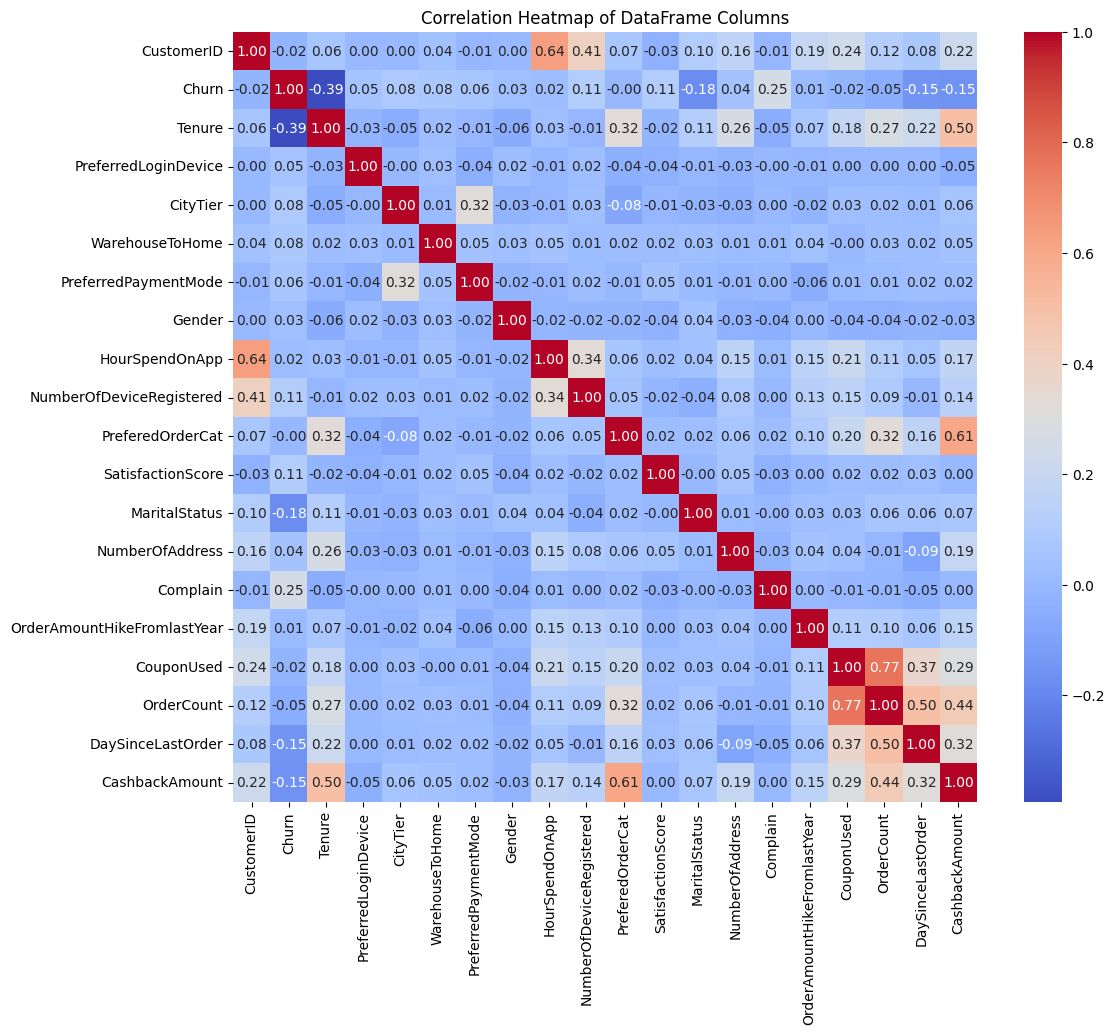

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# If your DataFrame contains non-numeric columns, you may need to encode or exclude them for the heatmap
# For this example, we'll include all columns

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()


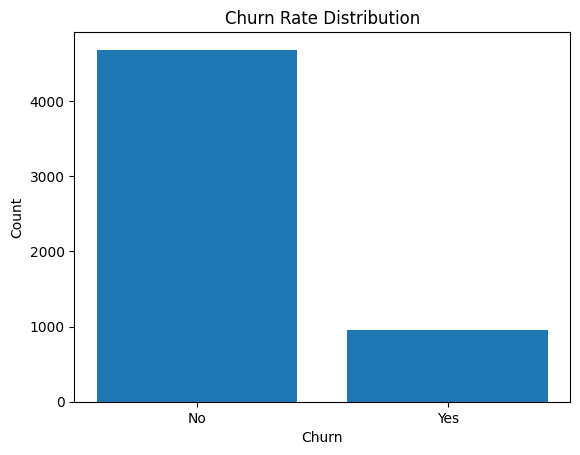

In [52]:
# The distribution of churn (Yes/No). This will help you understand the churn rate in your dataset.

# Count the number of customers in each churn category
churn_counts = data_encoded['Churn'].value_counts()

# Create a bar chart
plt.bar(churn_counts.index, churn_counts.values)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(churn_counts.index, ['No', 'Yes'])
plt.title('Churn Rate Distribution')
plt.show()

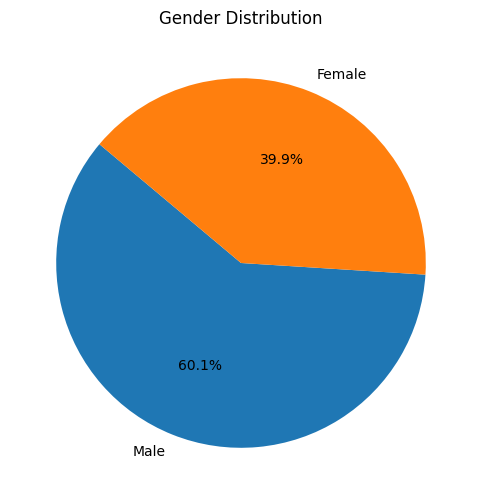

In [60]:
# Count the number of each gender
gender_counts = data['Gender'].value_counts()

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set the figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution')
plt.show()

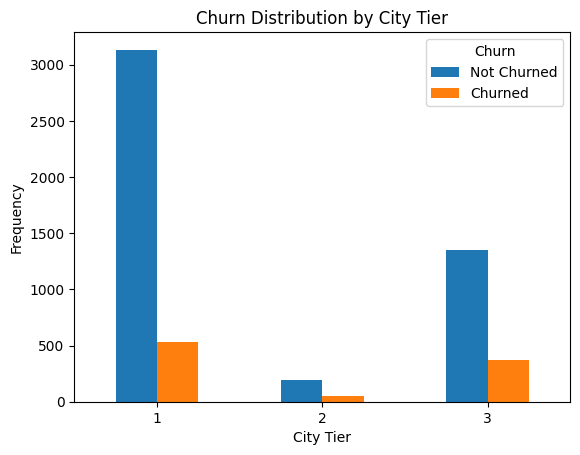

In [75]:
import matplotlib.pyplot as plt

# Group the data by CityTier and comparing the churn distribution
city_churn_distribution = data_encoded.groupby('CityTier')['Churn'].value_counts().unstack().fillna(0)

# Plot the bar chart
ax = city_churn_distribution.plot(kind='bar')
plt.xlabel('City Tier')
plt.ylabel('Frequency')
plt.title('Churn Distribution by City Tier')
plt.legend(title='Churn', labels=['Not Churned', 'Churned'])
plt.xticks(rotation=0)  # Rotate x-axis labels if needed


plt.show()


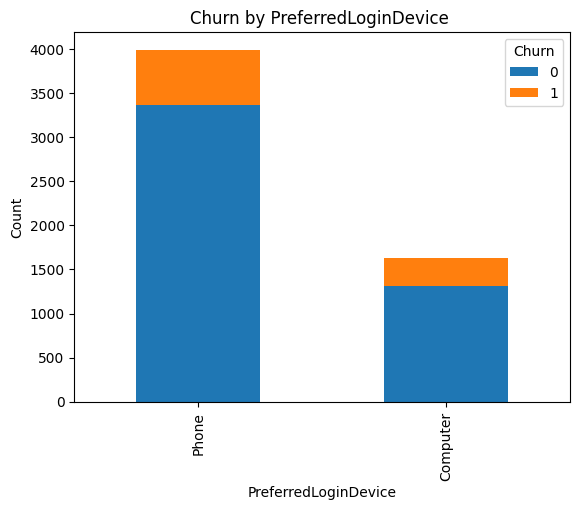

In [72]:
# analysing visually for the connection between preffered login id and customer churn

# Group the data and create a stacked bar plot
grouped_data = data_encoded.groupby(['PreferredLoginDevice', 'Churn']).size().unstack().plot(kind='bar', stacked=True)

# Set the plot title, x-label, and y-label
plt.title('Churn by PreferredLoginDevice ')
plt.xlabel('PreferredLoginDevice')
plt.ylabel('Count')

# Customize the x-axis labels
plt.xticks([0, 1], ['Phone', 'Computer'])

# Show the plot
plt.show()


In [76]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = data_encoded.drop(columns=["Churn"])
y = data_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = dt_classifier.predict(X_train)
y_test_pred = dt_classifier.predict(X_test)

# Calculate the accuracy of the model on the training data
train_accuracy = accuracy_score(y_train, y_train_pred)

# Calculate the accuracy of the model on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Decision Tree Training Accuracy:", train_accuracy)
print("Decision Tree Testing Accuracy:", test_accuracy)


Decision Tree Training Accuracy: 1.0
Decision Tree Testing Accuracy: 0.9484902309058615


In [77]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data_encoded.drop(columns=["Churn"])
y = data_encoded['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a Logistic Regression model
logistic_regression_model = LogisticRegression()

# Train the model on the training data
logistic_regression_model.fit(X_train, y_train)

# Calculate and print the training score (mean accuracy)
training_score = logistic_regression_model.score(X_train, y_train)
print("Logistic Regression Training Score:", training_score)

# Calculate and print the testing score (mean accuracy)
testing_score = logistic_regression_model.score(X_test, y_test)
print("Logistic Regression Testing Score:", testing_score)


Logistic Regression Training Score: 0.8570159857904085
Logistic Regression Testing Score: 0.8579040852575488


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
